<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/pytorch/ch3/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.2 线性回归的从零开始实现

In [0]:
%matplotlib inline 
import torch 
from IPython import display 
from matplotlib import pyplot as plt 
import numpy as np 
import random 

### 3.2.1 生成数据集

In [0]:
num_inputs = 2     # 2 个特征
num_examples = 1000     # 1000 个样本
true_w = [2, -3.4]
true_b = 4.2 
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [135]:
features[0], labels[0]

(tensor([ 0.1620, -0.6597]), tensor(6.7839))

In [136]:
features.shape    # 1000 层，2 列

torch.Size([1000, 2])

In [137]:
labels.shape    # 1000 层

torch.Size([1000])

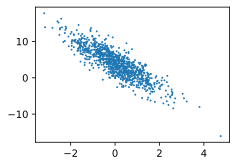

In [138]:
def use_svg_display():
    # 矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);    # 第二个特征 1000 个数，和 label 画图

In [139]:
len(features)

1000

### 3.2.2 读取数据集

In [0]:
# 这个函数每次返回 batch_size 个随机样本的特征和标签
def data_iter(batch_size, features, labels):
    num_examples = len(features)    # num_examples 等于 1000，是一个数
    indices = list(range(num_examples))    # 列表，有 1000 个元素
    random.shuffle(indices)    # 打乱
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        # 根据索引返回对应元素，每次取 batch_size 个
        yield features.index_select(0, j), labels.index_select(0, j)  # 0 是 dim，返回第 j 行

In [0]:
# my_num = 10 
# my_num

In [0]:
# my_indices = list(range(my_num))
# my_indices

In [0]:
# random.shuffle(my_indices)
# my_indices

In [0]:
# for i in range(0, my_num, 3):
#     print(i)

In [0]:
# for i in range(0, my_num, 3):
#     print(i)
#     j = torch.LongTensor(my_indices[i: i + 3])
#     print(j)

In [146]:
batch_size = 10 

# 每次返回 batch_size 个样本
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.2592, -0.1401],
        [ 0.9659, -0.8890],
        [-0.5741,  2.4914],
        [-0.5595, -1.2916],
        [-0.0661, -0.3741],
        [ 0.3544,  3.1017],
        [-0.0086, -0.3121],
        [-0.6513,  0.0655],
        [-0.0551,  0.5879],
        [-0.7365,  0.3899]]) 
 tensor([ 2.1649,  9.1704, -5.4148,  7.4768,  5.3336, -5.6348,  5.2580,  2.6728,
         2.1010,  1.3987])


### 3.2.3 初始化模型参数

In [0]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)   # 就是个 0：tensor([0.])

In [0]:
# w.shape

In [0]:
# b.shape

In [150]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [0]:
# w.requires_grad_?
# sets this tensor's :attr:`requires_grad` attribute in-place.

### 3.2.4 定义模型

In [0]:
def linreg(X, w, b):
    return torch.mm(X, w) + b 

### 3.2.5 定义损失函数

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2   # 转化成 y_hat 的 shape，对应相减，每一项平方，
                                  # 每一项除以 2，返回的 y_hat 的 shape

In [0]:
# my_x = torch.arange(6).view(2, 3)
# print(my_x ** 2)
# print(my_x ** 2 / 2)

### 3.2.6 定义优化算法

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size 

In [156]:
# 读注释，是监督学习的核心思想

lr = 0.03 
num_epochs = 3 
net = linreg 
loss = squared_loss 

loss_ls = []
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # 输入 X 和随机的参数产生输出，用真实的数字和产生结果求 loss
        l.backward()              # 本质上就是一个找参数的过程。调整参数，减小 loss。
        sgd([w, b], lr, batch_size)     # 最重要的就是这句，是整个算法的灵魂。
                            # 之所以能迭代运行，核心在于每次减梯度。
                            # 根据loss的梯度，不断迭代 w，b，loss 不断减小，最终参数接近真实值
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        loss_ls.append(l.float().mean().item())
    train_l = loss(net(features, w, b), labels) # 用这个 epoch 迭代出来的 w，b 算 loss
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.043894
epoch 2, loss 0.000171
epoch 3, loss 0.000051


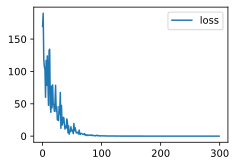

In [157]:
plt.plot(loss_ls, label='loss')
plt.legend()
plt.show()

In [158]:
print(true_w, '\n', w)

[2, -3.4] 
 tensor([[ 1.9995],
        [-3.3997]], requires_grad=True)


In [159]:
print(true_b, '\n', b)

4.2 
 tensor([4.1989], requires_grad=True)
